# Prediction Of Facebook Total Interactions (UCI Dataset)(POFTL)

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

C:\Users\krama\.conda\envs\gpu\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\krama\.conda\envs\gpu\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\krama\.conda\envs\gpu\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Importing Dataset

In [2]:
# Page total likes	Type	Category	Post Month	Post Weekday	Post Hour	Paid	Lifetime Post Total Reach	Lifetime Post Total Impressions	Lifetime Engaged Users	Lifetime Post Consumers	Lifetime Post Consumptions	Lifetime Post Impressions by people who have liked your Page	Lifetime Post reach by people who like your Page	Lifetime People who have liked your Page and engaged with your post	comment	like	share	Total Interactions
# LPTR	LPTI	LEU	LPU	LPC	LPIP	LPP	LPLP	comment	like	share	TI

df = pd.read_csv('dataset_Facebook.csv')

Exploratory Data Analysis

In [3]:
df.head()

,LPTR,LPTI,LEU,LPU,LPC,LPIP,LPP,LPLP,comment,like,share,TI
0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
1,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
2,2413,4373,177,113,154,2812,1503,132,0,66,14,80
3,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
4,7244,13594,671,410,580,6228,3200,396,19,325,49,393


In [4]:
df.isnull().sum()

LPTR       0
LPTI       0
LEU        0
LPU        0
LPC        0
LPIP       0
LPP        0
LPLP       0
comment    0
like       0
share      0
TI         0
dtype: int64

In [5]:
df['like'].replace(np.nan, 0)

0        79
1       130
2        66
3      1572
4       325
       ... 
495      53
496      53
497      93
498      91
499      91
Name: like, Length: 500, dtype: int64

In [6]:
df.isnull().sum()

LPTR       0
LPTI       0
LEU        0
LPU        0
LPC        0
LPIP       0
LPP        0
LPLP       0
comment    0
like       0
share      0
TI         0
dtype: int64

In [7]:
df.describe()

,LPTR,LPTI,LEU,LPU,LPC,LPIP,LPP,LPLP,comment,like,share,TI
count,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.590000,27.048000,212.120000
std,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.172528,42.511742,380.233118
min,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.000000,10.000000,71.000000
50%,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.250000,32.000000,228.500000
max,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


<AxesSubplot:>

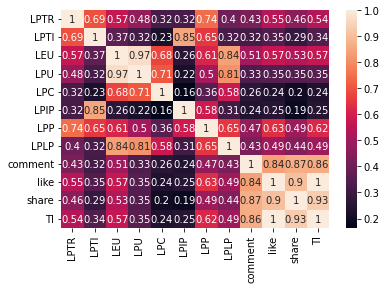

In [8]:
# plt.figsize(10, 9)
sns.heatmap(df.corr(), annot = True)

Regression

In [9]:
y = df.TI
x = df.drop('TI', axis =  1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 176)

In [10]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(375, 11) (125, 11) (375,) (125,)


In [11]:
from sklearn.linear_model import SGDRegressor as SGD

from xgboost import XGBRegressor as XGB

In [12]:
models = {'LinearRegression' : make_pipeline(StandardScaler(), LinearRegression()),
    'SVRegression' : make_pipeline(StandardScaler(), SVR()),
    'Lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'Ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'ElasticNet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'RandomForest' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'SGDRegressor' : make_pipeline(StandardScaler(), SGD(random_state=123)),
    'XGBRegressor' : make_pipeline(StandardScaler(), XGB(random_state=123)),
    'GradientBoosting' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))}


In [13]:
models

{'LinearRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())]),
 'SVRegression': Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]),
 'Lasso': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('lasso', Lasso(random_state=123))]),
 'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(random_state=123))]),
 'ElasticNet': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('elasticnet', ElasticNet(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor',
                  RandomForestRegressor(random_state=123))]),
 'SGDRegressor': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor', SGDRegressor(random_state=123))]),
 'XGBRegressor': Pipeline(steps=[('standardscaler', StandardScaler()),
                

In [14]:
models_fit = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    models_fit[name] = model
    print(f'{name}')

LinearRegression
SVRegression
Lasso
Ridge
ElasticNet
RandomForest
SGDRegressor
XGBRegressor
GradientBoosting


In [15]:
models_fit

{'LinearRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())]),
 'SVRegression': Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]),
 'Lasso': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('lasso', Lasso(random_state=123))]),
 'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(random_state=123))]),
 'ElasticNet': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('elasticnet', ElasticNet(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor',
                  RandomForestRegressor(random_state=123))]),
 'SGDRegressor': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor', SGDRegressor(random_state=123))]),
 'XGBRegressor': Pipeline(steps=[('standardscaler', StandardScaler()),
                

In [16]:
res1 = []
res2 = []
names = []
for name, model in models_fit.items():
    ypred = model.predict(xtest)
    names.append(name)
    r1 = r2_score(ytest, ypred)
    r2 = mae(ytest, ypred)
    res1 = np.append(res1, r1)
    res2 = np.append(res2, r2)
    output = "%s|Rsquared = %f mae = %f" %(name, r1, r2)
    print(output)

LinearRegression|Rsquared = 1.000000 mae = 0.000000
SVRegression|Rsquared = -0.019735 mae = 182.543418
Lasso|Rsquared = 0.999969 mae = 1.011538
Ridge|Rsquared = 0.999989 mae = 1.029701
ElasticNet|Rsquared = 0.975028 mae = 47.429043
RandomForest|Rsquared = 0.592532 mae = 47.943120
SGDRegressor|Rsquared = 0.999991 mae = 0.730966
XGBRegressor|Rsquared = 0.634365 mae = 43.730882
GradientBoosting|Rsquared = 0.591297 mae = 44.263611


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

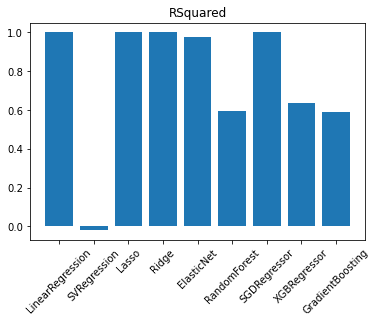

In [17]:
plt.bar(names, res1)
plt.title('RSquared')
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

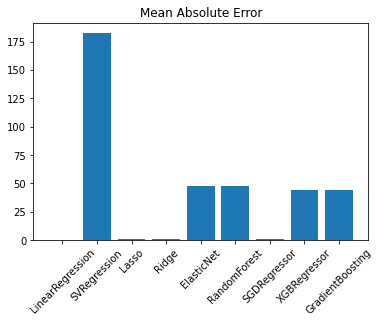

In [18]:
plt.bar(names, res2)
plt.title('Mean Absolute Error')
plt.xticks(rotation = 45)

array([1.        , 0.01973489, 0.99996917, 0.99998945, 0.97502768,
       0.59253195, 0.99999082, 0.63436529, 0.59129736])

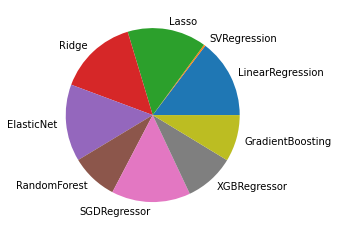

In [19]:
res1 = np.array(abs(res1))
plt.pie(res1, labels = names)
res1

HyperParameter Tuning

In [20]:
model = make_pipeline(StandardScaler(), SVR(kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0,
                                            epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1))

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print(f'{r2_score(ytest, ypred)}')
print(f'{mae(ytest, ypred)}')

0.9771123965857589
40.50308053904612


In [21]:
ypred

array([1.66404528e+02, 7.92178175e+01, 2.79545400e+01, 1.70347352e+03,
       4.49765751e+02, 1.37217835e+02, 2.58786140e+02, 8.96523916e+01,
       4.88667140e+01, 1.59890405e+02, 9.71358304e+01, 2.15568370e+01,
       3.22886375e+02, 1.32052426e+02, 1.10679354e+02, 4.01114954e+01,
       1.79893867e+02, 3.73123555e+02, 1.46007732e+02, 2.30148307e+02,
       7.92780177e+01, 1.22562517e+02, 5.38695450e+02, 9.97900567e+02,
       2.38093117e+02, 1.87542894e+02, 1.26731425e+02, 8.03707734e+01,
       9.18860372e+00, 9.62288998e+01, 3.43131136e+02, 9.63232007e+01,
       8.65533920e+01, 1.29049263e+02, 2.07496280e+01, 5.71164161e+02,
       1.60010588e+02, 1.78466522e+02, 1.23753533e+02, 2.53202072e+02,
       2.40700388e+02, 1.33581424e+01, 1.07212709e+02, 4.07623288e+02,
       1.25789029e+02, 1.64700154e+01, 2.66557964e+02, 8.16610056e+01,
       3.13750541e+01, 2.02388964e+02, 2.42930418e+02, 4.96889130e+01,
       5.65174155e+03, 2.44583665e+02, 3.18733964e+02, 1.17729347e+02,
      

In [22]:
np.array(ytest)

array([ 199,   54,   17, 1873,  410,  142,  299,   97,   55,  127,   81,
         14,  282,  122,  126,   17,  230,  458,  162,  282,   91,  137,
        713, 1136,  276,  200,  121,   75,    5,   87,  387,  104,   66,
        138,   17,  818,  172,  217,  115,  316,  234,    8,  126,  599,
        125,    2,  285,   56,   24,  188,  214,   53, 6334,  252,  228,
        101,   53,   67,   32,  121,  163,   68,  106,  130,  155,  186,
        129,   10,  128,  311,  252,    9,    9,  242,  232,  199,  114,
        135,  624,  122,  128,  164,  367,  165,  454,  622,   69,    7,
        505,   46,   60,    5,   98, 1290,  121,   85,   96,   89,   18,
        160,  238,  447,  136,   68,  220,  118,  106,  429,  269,  108,
        490,  152,   57,  137,  117,    0,   67,  132,  881,  572,  114,
       1626,    4,   99,   53], dtype=int64)

More Model(s) With Randomized Search

In [23]:
from sklearn.model_selection import RandomizedSearchCV as RS

In [24]:
rf_hyperparameters = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1, 2, 3, 4, 5], 
    'gamma' : ['scale', 'auto']
}

In [25]:
model1 = SVR()
model1 = RS(model1, rf_hyperparameters, n_jobs = -1)
model1.fit(xtrain, ytrain)
model1.best_params_
ypred1 = model1.predict(xtest)
print(f'{r2_score(ytest, ypred1)}')
print(f'{mae(ytest, ypred1)}')

0.09436567248219097
89.18346502609654


In [26]:
model1.best_params_
print(model1.best_params_)

{'kernel': 'poly', 'gamma': 'auto', 'degree': 1}


In [27]:
print(ypred1)

[ 2.06294759e+02  1.17862403e+02  1.60155450e+01 -4.61228741e+03
  4.05242545e+02  1.37560751e+02  2.99677617e+02 -7.06219648e+01
  4.80111864e+01  1.48338454e+02  3.53556539e+01  1.43356650e+01
  3.10619683e+02  1.23207940e+02  1.18924416e+02  2.60709589e+01
  2.02765584e+02  5.36600902e+02 -1.88674554e+02  2.87844323e+02
  8.41907775e+01  5.44986959e+02  5.80557372e+02  1.16685479e+03
  2.90792277e+02  2.01785802e+02  1.29284514e+02  9.37606170e+01
 -2.40851437e+00  7.96153004e+01  3.93409441e+02  1.18465303e+02
  9.24714084e+01  1.42364971e+02  1.33194597e+01  8.96964603e+02
  2.16359577e+02  2.20361848e+02  1.92020254e+02  3.90219862e+02
  2.05782461e+02 -1.01352377e+00  1.39806409e+02  6.78931842e+02
  1.77714631e+02  7.74454705e-01  2.98917783e+02  8.52987998e+01
  2.88772802e+01  1.78458176e+02  2.34269300e+02  5.39828890e+01
  6.36826096e+03  2.59288592e+02  2.03711717e+02  8.63492170e+01
  5.98895429e+01  6.10553338e+01  1.96402299e+01  1.59119532e+02
  1.51076812e+02  5.50687

In [28]:
print(np.array(ytest))

[ 199   54   17 1873  410  142  299   97   55  127   81   14  282  122
  126   17  230  458  162  282   91  137  713 1136  276  200  121   75
    5   87  387  104   66  138   17  818  172  217  115  316  234    8
  126  599  125    2  285   56   24  188  214   53 6334  252  228  101
   53   67   32  121  163   68  106  130  155  186  129   10  128  311
  252    9    9  242  232  199  114  135  624  122  128  164  367  165
  454  622   69    7  505   46   60    5   98 1290  121   85   96   89
   18  160  238  447  136   68  220  118  106  429  269  108  490  152
   57  137  117    0   67  132  881  572  114 1626    4   99   53]


Visualization

In [29]:
ypred1.shape

(125,)

In [30]:
ytest.shape

(125,)

In [31]:
from sklearn.linear_model import ElasticNet as EN

In [32]:
EN_hyperparameters = {
    'alpha' : [0, 0.2, 0.5, 0.7, 1],
    'l1_ratio' : [0, 0.2, 0.5, 0.7, 1], 
    'max_iter' : [100, 200, 500, 700, 1000, 1200, 1300, 1500], 
    'tol' : [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001], 
    'selection' : ['cyclic', 'random']
}

In [33]:
model2 = EN()
model2 = RS(model2, EN_hyperparameters, n_jobs = -1)
model2.fit(xtrain, ytrain)
model2.best_params_
ypred2 = model2.predict(xtest)
print(f'{r2_score(ytest, ypred2)}')
print(f'{mae(ytest, ypred2)}')

0.9999996483478966
0.18421283820441117


C:\Users\krama\.conda\envs\gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.783e+02, tolerance: 2.408e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [34]:
model2.best_params_
print(model2.best_params_)

{'tol': 1e-07, 'selection': 'random', 'max_iter': 1200, 'l1_ratio': 0.7, 'alpha': 0.7}
